In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
dataset = pd.read_csv("wine.csv")
dataset.shape

(178, 14)

In [66]:
dataset.head(5)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [67]:
dataset.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [68]:
X = dataset.iloc[:,0:12].values
y = dataset.iloc[:,13].values

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)

In [72]:
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.fit_transform(X_test, y_test)

In [73]:
explained_variance = lda.explained_variance_ratio_
explained_variance

array([0.5615102, 0.4384898])

In [74]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)

In [75]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [76]:
y_pred=classifier.predict(X_test)
y_pred

array([2, 3, 1, 2, 1, 1, 2, 3, 1, 1, 3, 3, 2, 1, 3, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 2, 2, 2], dtype=int64)

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matric = confusion_matrix(y_test, y_pred)
confusion_matric

array([[ 0, 14,  0],
       [16,  0,  0],
       [ 0,  0,  6]], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.16666666666666666

In [79]:
y_pred = classifier.predict(X_train)
y_pred

array([3, 2, 2, 3, 1, 1, 2, 2, 2, 1, 3, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3,
       2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3, 3, 2, 2,
       2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 2, 1, 2,
       2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 2, 1, 1,
       1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 2,
       3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3, 1, 1, 3, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 3], dtype=int64)

In [80]:
confusion_matric = confusion_matrix(y_train, y_pred)
confusion_matric

array([[45,  0,  0],
       [ 0, 55,  0],
       [ 0,  0, 42]], dtype=int64)

In [81]:
accuracy = accuracy_score(y_train, y_pred)
accuracy

1.0

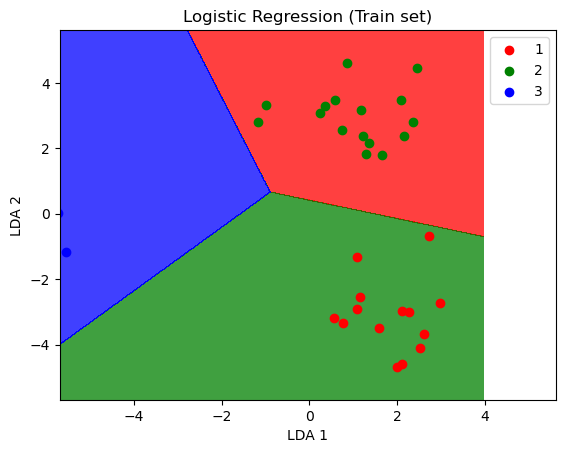

In [82]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=.01),
                    np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=.75, cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               color=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('Logistic Regression (Train set)')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.legend()
plt.show()

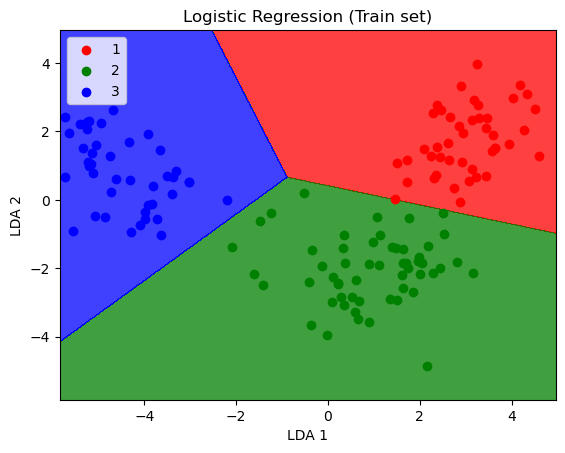

In [83]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=.01),
                    np.arange(start=X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=.75, cmap=ListedColormap(('red','green','blue')))
plt.xlim(X1.min(), X1.max())
plt.xlim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               color=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('Logistic Regression (Train set)')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.legend()
plt.show()

W wyniku porównania modeli PCA i LDA okazało się, że lepsze wyniki accuracy score osągnął model PCA. Dla próby testowej acc. wynosiło 0.16, a dla próby treningowej 1 Oznacza to, że model jest przetrenowany. Natomiast wyniki modelu PCA miały wartości 0.86 dal próby testowej i 0.92 dla treningowej.